In [74]:
import numpy as np
import pandas as pd

from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [75]:
wine = load_wine()

In [76]:
# Наименование признаков
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [77]:
# Размер датасета
wine.data.shape

(178, 13)

Формирование DataFrame

In [78]:
wine_df = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                       columns=list(wine['feature_names']) + ['target'])

In [79]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Разделение на обучающую и тестовую выборки

In [80]:
wine_X_train, wine_X_test, wine_Y_train, wine_Y_test = train_test_split(wine.data, wine.target, 
                                                                       test_size=0.3, random_state=1)

In [81]:
# Размер обучающей выборки
wine_X_train.shape, wine_Y_train.shape

((124, 13), (124,))

In [82]:
# Размер тестовой выборки
wine_X_test.shape, wine_Y_test.shape

((54, 13), (54,))

In [83]:
# 3 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=3)
cl1_1.fit(wine_X_train, wine_Y_train)

target1_1 = cl1_1.predict(wine_X_test)
len(target1_1), target1_1

(54,
 array([0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1,
        2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0,
        0, 0, 0, 0, 0, 0, 1, 2, 2, 0]))

In [84]:
# 5 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=5)
cl1_2.fit(wine_X_train, wine_Y_train)

target1_2 = cl1_2.predict(wine_X_test)
len(target1_2), target1_2

(54,
 array([1, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1,
        2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0,
        0, 0, 0, 0, 0, 0, 1, 2, 2, 0]))

Метрики качества классификации

In [85]:
# Accuracy
# wine_Y_test = эталон
# target = предсказанное значение классов

# 3 ближайших
accuracy_score(wine_Y_test, target1_1)

0.7407407407407407

In [86]:
# 5 ближайших
accuracy_score(wine_Y_test, target1_2)

0.7037037037037037

In [87]:
# Confusion Matrix
# Конвертация целевого признака в бинарный

def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает, то 1
    res = [1 if x==target else 0 for x in array]
    return res
bin_wine_Y_test = convert_target_to_binary(wine_Y_test, 2)
bin_target1_1 = convert_target_to_binary(target1_1, 2)
bin_target1_2 = convert_target_to_binary(target1_2, 2)

confusion_matrix(bin_wine_Y_test, bin_target1_1, labels=[0, 1])

array([[36,  6],
       [ 6,  6]], dtype=int64)

In [88]:
tn, fp, fn, tp = confusion_matrix(bin_wine_Y_test, bin_target1_1).ravel()
tn, fp, fn, tp

(36, 6, 6, 6)

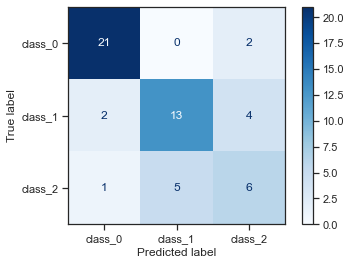

In [89]:
plot_confusion_matrix(cl1_1, wine_X_test, wine_Y_test, 
                      display_labels=wine.target_names, cmap=plt.cm.Blues)

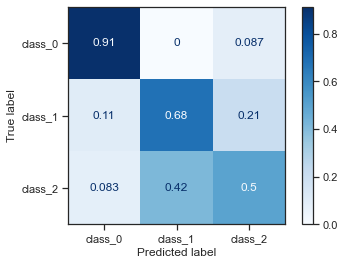

In [90]:
plot_confusion_matrix(cl1_1, wine_X_test, wine_Y_test, 
                      display_labels=wine.target_names, cmap=plt.cm.Blues,
                      normalize='true')

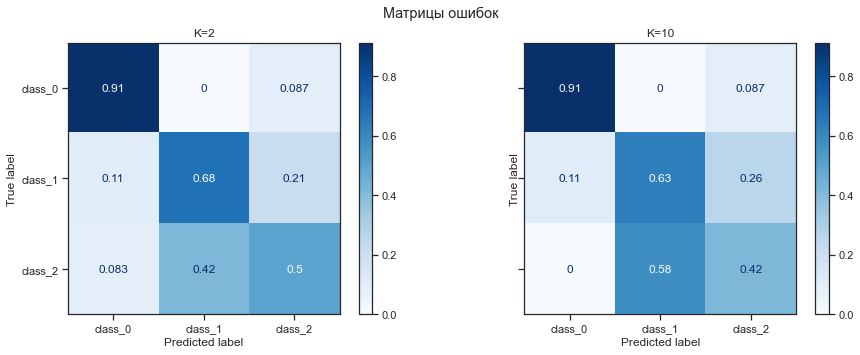

In [91]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))

plot_confusion_matrix(cl1_1, wine_X_test, wine_Y_test,
                      display_labels=wine.target_names,
                      cmap=plt.cm.Blues, normalize='true', ax=ax[0])

plot_confusion_matrix(cl1_2, wine_X_test, wine_Y_test,
                      display_labels=wine.target_names,
                      cmap=plt.cm.Blues, normalize='true', ax=ax[1])

fig.suptitle('Матрицы ошибок')
ax[0].title.set_text('K=2')
ax[1].title.set_text('K=10')

In [92]:
# Precision, recall, F-мера

# 3 ближайших
precision_score(bin_wine_Y_test, bin_target1_1), recall_score(bin_wine_Y_test, bin_target1_1)

(0.5, 0.5)

In [93]:
# 5 ближайших
precision_score(bin_wine_Y_test, bin_target1_2), recall_score(bin_wine_Y_test, bin_target1_2)

(0.4166666666666667, 0.4166666666666667)

In [94]:
precision_score(wine_Y_test, target1_1, average='micro')

0.7407407407407407

In [95]:
# Без учета веса класса
precision_score(wine_Y_test, target1_1, average='macro')

0.6990740740740741

In [96]:
# С учетом веса классов
precision_score(wine_Y_test, target1_1, average='weighted')

0.7379115226337448

In [97]:
classification_report(wine_Y_test, target1_1,
                      target_names=wine.target_names, output_dict=True)

{'class_0': {'precision': 0.875,
  'recall': 0.9130434782608695,
  'f1-score': 0.8936170212765957,
  'support': 23},
 'class_1': {'precision': 0.7222222222222222,
  'recall': 0.6842105263157895,
  'f1-score': 0.7027027027027027,
  'support': 19},
 'class_2': {'precision': 0.5, 'recall': 0.5, 'f1-score': 0.5, 'support': 12},
 'accuracy': 0.7407407407407407,
 'macro avg': {'precision': 0.6990740740740741,
  'recall': 0.6990846681922197,
  'f1-score': 0.6987732413264328,
  'support': 54},
 'weighted avg': {'precision': 0.7379115226337448,
  'recall': 0.7407407407407407,
  'f1-score': 0.7389730155687603,
  'support': 54}}

ROC-кривая и ROC AUC

In [98]:
fpr, tpr, thresholds = roc_curve(bin_wine_Y_test, bin_target1_1,
                                 pos_label=1)
fpr, tpr, thresholds

(array([0.        , 0.14285714, 1.        ]),
 array([0. , 0.5, 1. ]),
 array([2, 1, 0]))

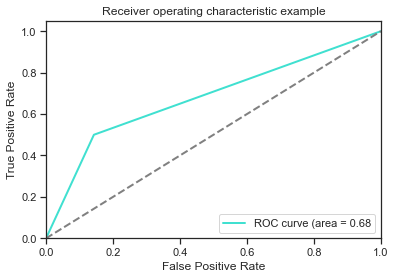

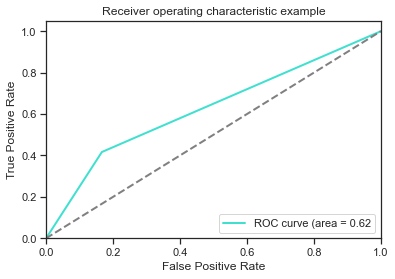

In [125]:
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score,
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='turquoise',
             lw=lw, label='ROC curve (area = %0.2f' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.show()
    
# 3 ближайших
draw_roc_curve(bin_wine_Y_test, bin_target1_1, pos_label=1, average='micro')
    
# 5 ближайших
draw_roc_curve(bin_wine_Y_test, bin_target1_2, pos_label=1, average='micro')

In [100]:
wine_cross = cross_val_score(KNeighborsClassifier(n_neighbors=2),
                             wine.data, wine.target, cv=11)
wine_cross

array([0.58823529, 0.64705882, 0.6875    , 0.5625    , 0.5625    ,
       0.625     , 0.8125    , 0.6875    , 0.8125    , 0.75      ,
       0.75      ])

In [101]:
np.mean(wine_cross)

0.68048128342246

In [102]:
wining = {'precision': 'precision_weighted',
          'recall': 'recall_weighted',
          'f1': 'f1_weighted'}

wine_cross = cross_validate(KNeighborsClassifier(n_neighbors=2),
                            wine.data, wine.target, scoring=wining,
                            cv=3, return_train_score=True)
wine_cross

{'fit_time': array([0.00100255, 0.00050139, 0.00050163]),
 'score_time': array([0.00651455, 0.00601339, 0.00601387]),
 'test_precision': array([0.48984127, 0.62317561, 0.70585516]),
 'train_precision': array([0.91000807, 0.8877454 , 0.85825075]),
 'test_recall': array([0.56666667, 0.6440678 , 0.72881356]),
 'train_recall': array([0.89830508, 0.87394958, 0.83193277]),
 'test_f1': array([0.51069094, 0.6198816 , 0.6798559 ]),
 'train_f1': array([0.89415947, 0.8703245 , 0.8181316 ])}

Нахождение наилучшего гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [103]:
n_range = np.array(range(5, 30, 1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
         22, 23, 24, 25, 26, 27, 28, 29])}]

In [104]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters,
                      cv=5, scoring='accuracy')
clf_gs.fit(wine_X_train, wine_Y_train)

Wall time: 605 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [105]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00060105, 0.00070167, 0.00110264, 0.00100374, 0.00070162,
        0.00090179, 0.00100331, 0.00080175, 0.00060048, 0.00059934,
        0.00080385, 0.00050073, 0.00060158, 0.00050139, 0.00060096,
        0.0005003 , 0.00120263, 0.00360789, 0.00110283, 0.0019032 ,
        0.0006012 , 0.00060024, 0.00200419, 0.00050144, 0.00049877]),
 'std_fit_time': array([2.00510280e-04, 2.45477094e-04, 2.00057562e-04, 6.33204593e-04,
        2.45613048e-04, 5.84434964e-04, 6.35954867e-04, 2.45340545e-04,
        1.97347260e-04, 2.01643006e-04, 4.04373868e-04, 4.86280395e-07,
        2.00605477e-04, 3.37174788e-07, 1.99961740e-04, 1.73636832e-06,
        5.10856311e-04, 3.72841647e-03, 4.90582888e-04, 1.83205304e-03,
        2.00557822e-04, 2.01647077e-04, 2.76327783e-03, 3.50402318e-07,
        4.77551878e-06]),
 'mean_score_time': array([0.00200458, 0.00952134, 0.00440965, 0.00460882, 0.00220475,
        0.00240555, 0.00240407, 0.00260611, 0.00210381, 0.00200453,
        0.00

In [106]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

In [107]:
# Лучшее значение метрики
clf_gs.best_score_

0.7500000000000001

In [108]:
# Лучшее значение параметров
clf_gs.best_params_


{'n_neighbors': 22}